In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import mglearn
mglearn.plots.plot_logistic_regression_graph()

In [ ]:
mglearn.plots.plot_single_hidden_layer_graph()

In [ ]:
line = np.linspace(-3, 3, 100)
plt.figure()
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.title("activation_functions")

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)


mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)

plt.figure()
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=60, cmap=mglearn.cm2)

# Exercise
Compare ``MLPRegressor`` to linear methods on the boston and bike datasets. Try varying the number of hidden layers and nodes in the hidden layers. Compare ``adam`` and ``l-bfgs`` algorithms in terms of outcome and time.

How do the results differ with and without scaling the data?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams["figure.dpi"] = 100
np.set_printoptions(precision=3, suppress=True)
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

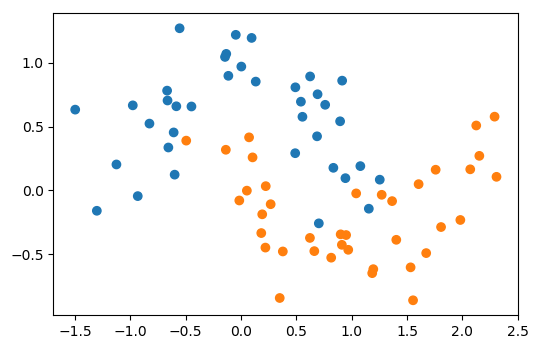

In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=2)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

plt.scatter(X_train[:, 0], X_train[:, 1], c=plt.cm.Vega10(y_train))
xlim = plt.xlim()
ylim = plt.ylim()

In [3]:
xs = np.linspace(xlim[0], xlim[1], 1000)
ys = np.linspace(ylim[0], ylim[1], 1000)
xx, yy = np.meshgrid(xs, ys)
X_grid = np.c_[xx.ravel(), yy.ravel()]

In [4]:
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
print(mlp.score(X_train, y_train))
print(mlp.score(X_test, y_test))

1.0
0.88


(-0.9780489401612551, 1.3876016710787114)

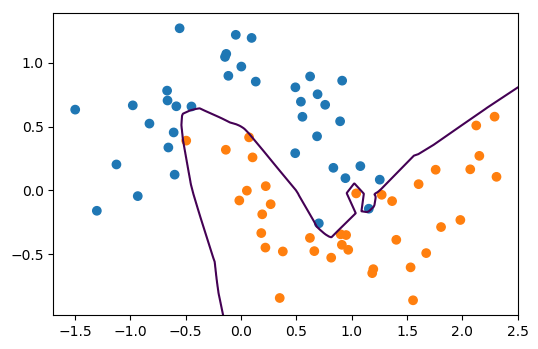

In [5]:
plt.contour(xx, yy, mlp.predict_proba(X_grid)[:, 1].reshape(xx.shape), levels=[.5])
plt.scatter(X_train[:, 0], X_train[:, 1], c=plt.cm.Vega10(y_train))

plt.xlim(xlim)
plt.ylim(ylim)

1.0
0.88
1.0
0.84
1.0
0.84
1.0
0.84
1.0
0.88
1.0
0.92
1.0
0.88
0.973333333333
0.92
1.0
0.88


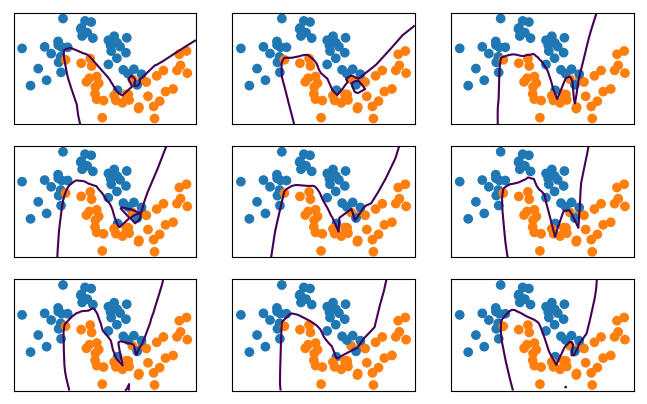

In [6]:
fig, axes = plt.subplots(3, 3, figsize=(8, 5))
for ax, i in zip(axes.ravel(), range(10)):
    mlp = MLPClassifier(solver='lbfgs', random_state=i).fit(X_train, y_train)
    print(mlp.score(X_train, y_train))
    print(mlp.score(X_test, y_test))

    ax.contour(xx, yy, mlp.predict_proba(X_grid)[:, 1].reshape(xx.shape), levels=[.5])
    ax.scatter(X_train[:, 0], X_train[:, 1], c=plt.cm.Vega10(y_train))

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_xticks(())
    ax.set_yticks(())

In [7]:
mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(10, 10, 10), random_state=0)
mlp.fit(X_train, y_train)
print(mlp.score(X_train, y_train))
print(mlp.score(X_test, y_test))

0.973333333333
0.84


(-0.9780489401612551, 1.3876016710787114)

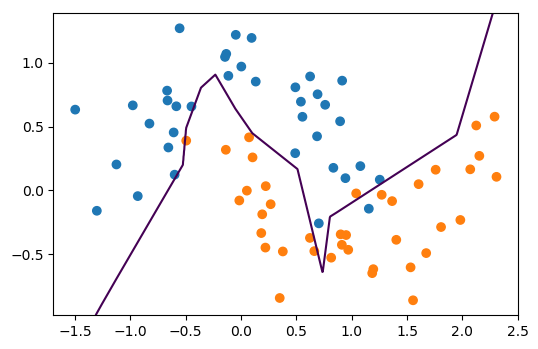

In [8]:
plt.contour(xx, yy, mlp.predict_proba(X_grid)[:, 1].reshape(xx.shape), levels=[.5])
plt.scatter(X_train[:, 0], X_train[:, 1], c=plt.cm.Vega10(y_train))

plt.xlim(xlim)
plt.ylim(ylim)

In [9]:
mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(10, 10, 10), activation="tanh", random_state=0)
mlp.fit(X_train, y_train)
print(mlp.score(X_train, y_train))
print(mlp.score(X_test, y_test))

1.0
0.92


(-0.9780489401612551, 1.3876016710787114)

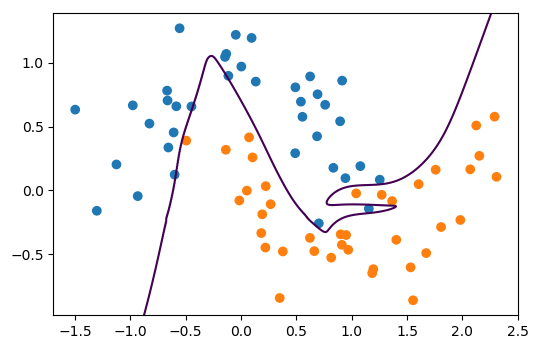

In [10]:
plt.contour(xx, yy, mlp.predict_proba(X_grid)[:, 1].reshape(xx.shape), levels=[.5])
plt.scatter(X_train[:, 0], X_train[:, 1], c=plt.cm.Vega10(y_train))

plt.xlim(xlim)
plt.ylim(ylim)

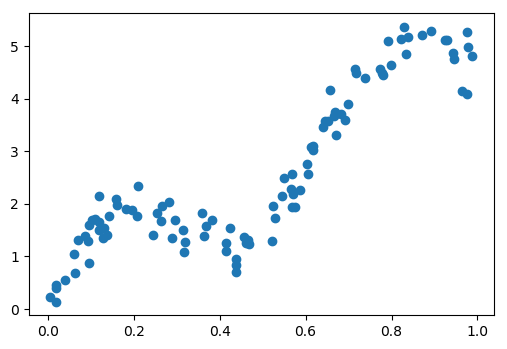

In [11]:
rng = np.random.RandomState(0)
x = np.sort(rng.uniform(size=100))
y = np.sin(10 * x) + 5 * x + np.random.normal(0, .3, size=100)
plt.plot(x, y, 'o')

In [12]:
line = np.linspace(0, 1, 100)
X = x.reshape(-1, 1)

In [13]:
from sklearn.neural_network import MLPRegressor
mlp_relu = MLPRegressor(solver="lbfgs").fit(X, y)
mlp_tanh = MLPRegressor(solver="lbfgs", activation='tanh').fit(X, y)

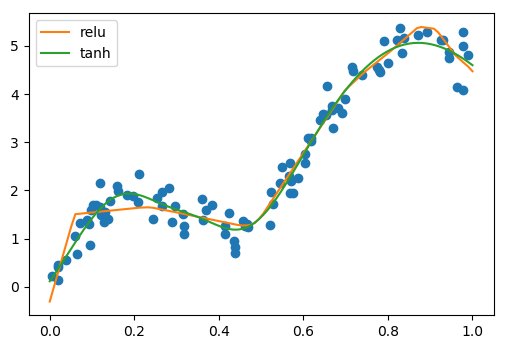

In [14]:
plt.plot(x, y, 'o')
plt.plot(line, mlp_relu.predict(line.reshape(-1, 1)), label="relu")
plt.plot(line, mlp_tanh.predict(line.reshape(-1, 1)), label="tanh")
plt.legend()

In [15]:
from sklearn.datasets import load_digits
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(
    digits.data / 16., digits.target, stratify=digits.target, random_state=0)

In [16]:
mlp = MLPClassifier(max_iter=1000, random_state=0).fit(X_train, y_train)
print(mlp.score(X_train, y_train))
print(mlp.score(X_test, y_test))

1.0
0.98


In [17]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, stratify=data.target, random_state=0)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
mlp = MLPClassifier(max_iter=1000, random_state=0).fit(X_train_scaled, y_train)
print(mlp.score(X_train_scaled, y_train))
print(mlp.score(X_test_scaled, y_test))

0.99765258216
0.958041958042


In [20]:
mlp = MLPClassifier(solver="lbfgs", random_state=1).fit(X_train_scaled, y_train)
print(mlp.score(X_train_scaled, y_train))
print(mlp.score(X_test_scaled, y_test))

1.0
0.958041958042


In [21]:
from sklearn.model_selection import GridSearchCV
pipe = make_pipeline(StandardScaler(), MLPClassifier(solver="lbfgs", random_state=1))
param_grid = {'mlpclassifier__alpha': np.logspace(-3, 3, 7)}
grid = GridSearchCV(pipe, param_grid, cv=5)

In [22]:
grid.fit(X_train, y_train)

/home/andy/checkout/scikit-learn/sklearn/model_selection/_search.py:714: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('mlpclassifier', MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
 ...True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid={'mlpclassifier__alpha': array([    0.001,     0.01 ,     0.1  ,     1.   ,    10.   ,   100.   ,
        1000.   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [23]:
results = pd.DataFrame(grid.cv_results_)
res = results.pivot_table(index="param_mlpclassifier__alpha",
                          values=["mean_test_score", "mean_train_score"])

/home/andy/checkout/scikit-learn/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/andy/checkout/scikit-learn/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/andy/checkout/scikit-learn/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/andy/checkout/scikit-learn/sklearn/utils/deprecation.py:122: FutureWarning: You a

In [24]:
res

,mean_test_score,mean_train_score
param_mlpclassifier__alpha,,
0.001,0.978873,1.000000
0.010,0.981221,1.000000
0.100,0.971831,1.000000
1.000,0.978873,0.999412
10.000,0.983568,0.990612
100.000,0.938967,0.945427
1000.000,0.626761,0.626761


(0.95, 1.01)

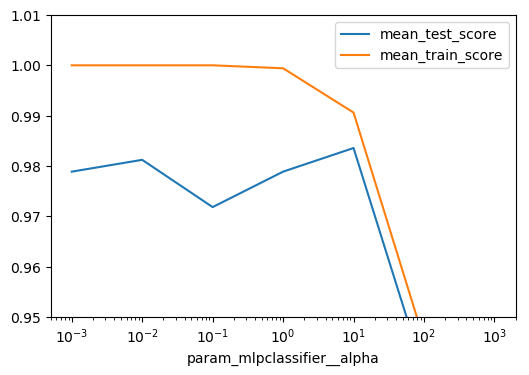

In [25]:
res.plot()
plt.xscale("log")
plt.ylim(0.95, 1.01)

In [26]:
res = results.pivot_table(index="param_mlpclassifier__alpha", values=["mean_test_score", "mean_train_score", "std_test_score", "std_train_score"])

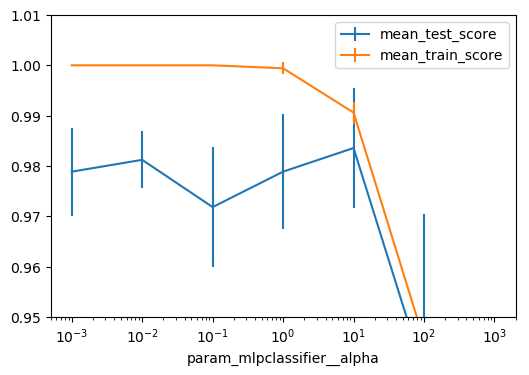

In [27]:
res.mean_test_score.plot(yerr=res.std_test_score)
res.mean_train_score.plot(yerr=res.std_train_score)
plt.xscale("log")
plt.ylim(0.95, 1.01)
plt.legend()

In [28]:
from sklearn.model_selection import GridSearchCV
pipe = make_pipeline(StandardScaler(), MLPClassifier(solver="lbfgs", random_state=1))
param_grid = {'mlpclassifier__hidden_layer_sizes':
              [(10,), (50,), (100,), (500,), (10, 10), (50, 50), (100, 100), (500, 500)]
             }
grid = GridSearchCV(pipe, param_grid, cv=5)

In [29]:
grid.fit(X_train, y_train)

/home/andy/checkout/scikit-learn/sklearn/model_selection/_search.py:714: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('mlpclassifier', MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
 ...True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid={'mlpclassifier__hidden_layer_sizes': [(10,), (50,), (100,), (500,), (10, 10), (50, 50), (100, 100), (500, 500)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [30]:
results = pd.DataFrame(grid.cv_results_)
res = results.pivot_table(index="param_mlpclassifier__hidden_layer_sizes", values=["mean_test_score", "mean_train_score", "std_test_score", "std_train_score"])

/home/andy/checkout/scikit-learn/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/andy/checkout/scikit-learn/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/andy/checkout/scikit-learn/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/andy/checkout/scikit-learn/sklearn/utils/deprecation.py:122: FutureWarning: You a

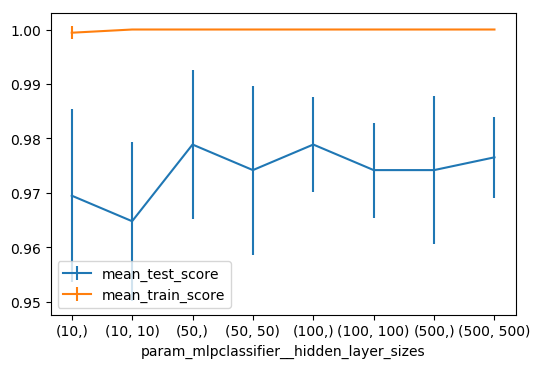

In [31]:
res.mean_test_score.plot(yerr=res.std_test_score)
res.mean_train_score.plot(yerr=res.std_train_score)
plt.legend()

In [32]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
pipe = make_pipeline(StandardScaler(), MLPClassifier(solver="lbfgs", random_state=1))
param_grid = {'mlpclassifier__hidden_layer_sizes':
              [(10,), (25,), (50,), (100,) , (10, 10), (25, 25), (50, 50)]
             }
grid = GridSearchCV(pipe, param_grid)

In [33]:
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('mlpclassifier', MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
 ...True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid={'mlpclassifier__hidden_layer_sizes': [(10,), (25,), (50,), (100,), (10, 10), (25, 25), (50, 50)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [34]:
results = pd.DataFrame(grid.cv_results_)
res = results.pivot_table(index="param_mlpclassifier__hidden_layer_sizes", values=["mean_test_score", "mean_train_score", "std_test_score", "std_train_score"])

/home/andy/checkout/scikit-learn/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/andy/checkout/scikit-learn/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/andy/checkout/scikit-learn/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/andy/checkout/scikit-learn/sklearn/utils/deprecation.py:122: FutureWarning: You a

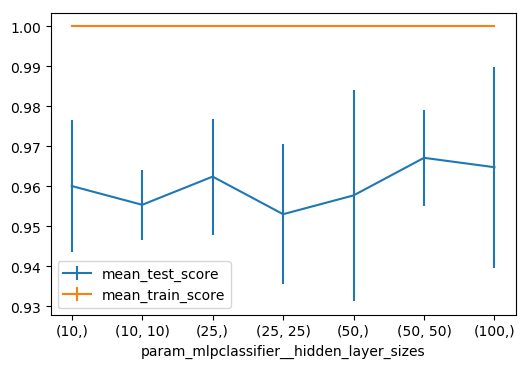

In [35]:
res.mean_test_score.plot(yerr=res.std_test_score)
res.mean_train_score.plot(yerr=res.std_train_score)
plt.legend()

In [36]:
mlp = MLPClassifier(solver="lbfgs", hidden_layer_sizes=(2,), random_state=0).fit(X_train_scaled, y_train)
print(mlp.score(X_train_scaled, y_train))
print(mlp.score(X_test_scaled, y_test))

0.99765258216
0.958041958042


In [37]:
mlp.coefs_[0].shape

(30, 2)

In [38]:
hidden = np.maximum(0, np.dot(X_test_scaled, mlp.coefs_[0]) + mlp.intercepts_[0])
hidden = np.dot(X_test_scaled, mlp.coefs_[0])  + mlp.intercepts_[0]

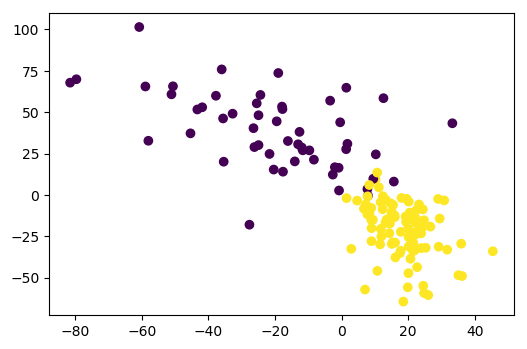

In [39]:
plt.scatter(hidden[:, 0], hidden[:, 1], c=y_test)

In [40]:
from sklearn.linear_model import LogisticRegression
LogisticRegression().fit(X_train_scaled, y_train).score(X_test_scaled, y_test)

0.95804195804195802

# Keras

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential([
    Dense(32, input_shape=(784,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

In [17]:
model = Sequential()
model.add(Dense(32, input_dim=784))
model.add(Activation('relu'))

In [128]:
model = Sequential([
    Dense(32, input_shape=(784,), activation='relu'),
    Dense(10, activation='softmax'),
])

In [189]:
model = Sequential([
    Dense(32, input_shape=(784,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

In [190]:
model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])

In [191]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_165 (Dense)            (None, 32)                25120     
_________________________________________________________________
activation_113 (Activation)  (None, 32)                0         
_________________________________________________________________
dense_166 (Dense)            (None, 10)                330       
_________________________________________________________________
activation_114 (Activation)  (None, 10)                0         
Total params: 25,450.0
Trainable params: 25,450.0
Non-trainable params: 0.0
_________________________________________________________________


In [192]:
from keras.datasets import mnist
import keras

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [193]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

num_classes = 10
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


In [194]:
model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 3s - loss: 0.4897 - acc: 0.8680     
Epoch 2/10
60000/60000 [==============================] - 2s - loss: 0.2425 - acc: 0.9325     
Epoch 3/10
60000/60000 [==============================] - 2s - loss: 0.1993 - acc: 0.9442     
Epoch 4/10
60000/60000 [==============================] - 1s - loss: 0.1728 - acc: 0.9514     
Epoch 5/10
60000/60000 [==============================] - 1s - loss: 0.1519 - acc: 0.9570     
Epoch 6/10
60000/60000 [==============================] - 2s - loss: 0.1378 - acc: 0.9612     
Epoch 7/10
60000/60000 [==============================] - 2s - loss: 0.1263 - acc: 0.9636     
Epoch 8/10
60000/60000 [==============================] - 2s - loss: 0.1155 - acc: 0.9669     
Epoch 9/10
60000/60000 [==============================] - 1s - loss: 0.1071 - acc: 0.9694     
Epoch 10/10
60000/60000 [==============================] - 1s - loss: 0.0997 - acc: 0.9715     


In [197]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss: {:.3f}".format(score[0]))
print("Test Accuracy: {:.3f}".format(score[1]))

Test loss: 0.120
Test Accuracy: 0.966


In [134]:
# recreating the model seems the only way to reset?
model = Sequential([
    Dense(32, input_shape=(784,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])
model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])

In [135]:
model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s - loss: 0.5146 - acc: 0.8616 - val_loss: 0.2425 - val_acc: 0.9322
Epoch 2/10
54000/54000 [==============================] - 1s - loss: 0.2618 - acc: 0.9266 - val_loss: 0.1934 - val_acc: 0.9442
Epoch 3/10
54000/54000 [==============================] - 1s - loss: 0.2161 - acc: 0.9397 - val_loss: 0.1717 - val_acc: 0.9537
Epoch 4/10
54000/54000 [==============================] - 1s - loss: 0.1879 - acc: 0.9470 - val_loss: 0.1519 - val_acc: 0.9570
Epoch 5/10
54000/54000 [==============================] - 1s - loss: 0.1676 - acc: 0.9528 - val_loss: 0.1440 - val_acc: 0.9603
Epoch 6/10
54000/54000 [==============================] - 1s - loss: 0.1506 - acc: 0.9566 - val_loss: 0.1296 - val_acc: 0.9638
Epoch 7/10
54000/54000 [==============================] - 1s - loss: 0.1378 - acc: 0.9603 - val_loss: 0.1281 - val_acc: 0.9627
Epoch 8/10
54000/54000 [==============================] - 1s -

In [136]:
model = Sequential([
    Dense(32, input_shape=(784,), activation='relu'),
    Dense(10, activation='softmax'),
])
model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
history_callback = model.fit(X_train, y_train, batch_size=128,
                             epochs=100, verbose=1, validation_split=.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 2s - loss: 0.5326 - acc: 0.8579 - val_loss: 0.2436 - val_acc: 0.9325
Epoch 2/100
54000/54000 [==============================] - 1s - loss: 0.2685 - acc: 0.9243 - val_loss: 0.1953 - val_acc: 0.9465
Epoch 3/100
54000/54000 [==============================] - 1s - loss: 0.2248 - acc: 0.9368 - val_loss: 0.1723 - val_acc: 0.9533
Epoch 4/100
54000/54000 [==============================] - 1s - loss: 0.1972 - acc: 0.9435 - val_loss: 0.1582 - val_acc: 0.9567
Epoch 5/100
54000/54000 [==============================] - 1s - loss: 0.1761 - acc: 0.9491 - val_loss: 0.1478 - val_acc: 0.9618
Epoch 6/100
54000/54000 [==============================] - 1s - loss: 0.1594 - acc: 0.9537 - val_loss: 0.1394 - val_acc: 0.9625
Epoch 7/100
54000/54000 [==============================] - 1s - loss: 0.1449 - acc: 0.9578 - val_loss: 0.1264 - val_acc: 0.9645
Epoch 8/100
54000/54000 [==============================

In [164]:
def plot_history(logger):
    df = pd.DataFrame(logger.history)
    df[['acc', 'val_acc']].plot()
    plt.ylabel("accuracy")
    df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
    plt.ylabel("loss")

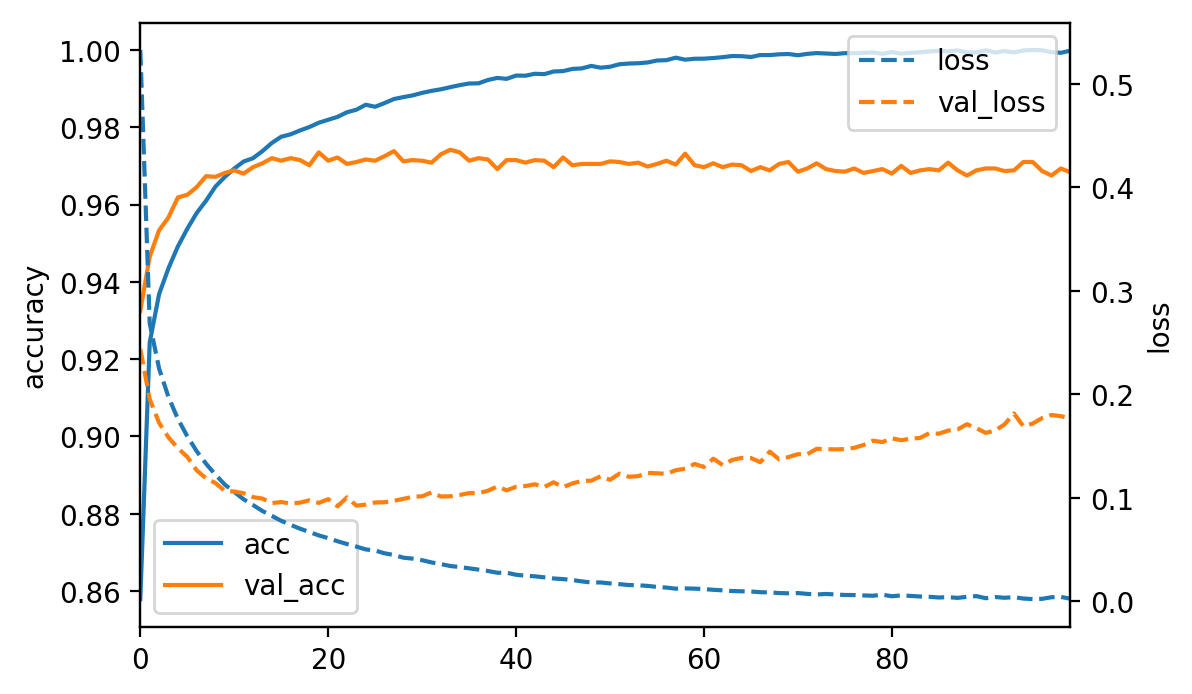

In [144]:
df = pd.DataFrame(history_callback.history)
df[['acc', 'val_acc']].plot()
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss")

In [28]:
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV

def make_model(optimizer="adam", hidden_size=32):
    model = Sequential([
        Dense(hidden_size, input_shape=(784,)),
        Activation('relu'),
        Dense(10),
        Activation('softmax'),
    ])
    model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=['accuracy'])
    return model

clf = KerasClassifier(make_model)

param_grid = {'epochs': [1, 5, 10],  # epochs is fit parameter, not in make_model!
              'hidden_size': [32, 64, 256]}

grid = GridSearchCV(clf, param_grid=param_grid, cv=5)

In [29]:
grid.fit(X_train, y_train)

Epoch 1/1
48000/48000 [==============================] - 3s - loss: 0.3930 - acc: 0.8900     
Epoch 2/5
48000/48000 [==============================] - 2s - loss: 0.2084 - acc: 0.9402     
Epoch 3/5
48000/48000 [==============================] - 3s - loss: 0.1641 - acc: 0.9524     
Epoch 4/5
48000/48000 [==============================] - 2s - loss: 0.1367 - acc: 0.9606     
Epoch 5/5
48000/48000 [==============================] - 4s - loss: 0.3337 - acc: 0.9059     
Epoch 2/5
48000/48000 [==============================] - 4s - loss: 0.1606 - acc: 0.9522     
Epoch 3/5
48000/48000 [==============================] - 3s - loss: 0.1179 - acc: 0.9648     
Epoch 4/5
48000/48000 [==============================] - 3s - loss: 0.0930 - acc: 0.9722     
Epoch 5/5
48000/48000 [==============================] - 8s - loss: 0.2480 - acc: 0.9289     
Epoch 2/5
48000/48000 [==============================] - 8s - loss: 0.1040 - acc: 0.9691     
Epoch 3/5
48000/48000 [==============================] - 8s 

GridSearchCV(cv=5, error_score='raise',
       estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f6ffea94160>,
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'epochs': [1, 5, 10], 'hidden_size': [32, 64, 256]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [33]:
res = pd.DataFrame(grid.cv_results_)
res.pivot_table(index=["param_epochs", "param_hidden_size"],
                values=['mean_train_score', "mean_test_score"])

mean_test_score  mean_train_score
param_epochs param_hidden_size                                   
1            32                        0.930017          0.935350
             64                        0.941433          0.948358
             256                       0.959117          0.966929
5            32                        0.956417          0.969746
             64                        0.967317          0.983113
             256                       0.973900          0.992196
10           32                        0.960100          0.979671
             64                        0.968617          0.992025
             256                       0.975050          0.996396

In [165]:

model = Sequential([
    Dense(1024, input_shape=(784,), activation='relu'),
    Dense(1024, activation='relu'),
    Dense(10, activation='softmax'),
])
model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=128,
                    epochs=20, verbose=1, validation_split=.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 32s - loss: 0.2006 - acc: 0.9386 - val_loss: 0.1042 - val_acc: 0.9710
Epoch 2/20
54000/54000 [==============================] - 30s - loss: 0.0740 - acc: 0.9766 - val_loss: 0.0729 - val_acc: 0.9777
Epoch 3/20
54000/54000 [==============================] - 32s - loss: 0.0470 - acc: 0.9846 - val_loss: 0.0808 - val_acc: 0.9765
Epoch 4/20
54000/54000 [==============================] - 32s - loss: 0.0357 - acc: 0.9886 - val_loss: 0.0810 - val_acc: 0.9785
Epoch 5/20
54000/54000 [==============================] - 34s - loss: 0.0273 - acc: 0.9911 - val_loss: 0.0740 - val_acc: 0.9798
Epoch 6/20
54000/54000 [==============================] - 35s - loss: 0.0216 - acc: 0.9932 - val_loss: 0.0888 - val_acc: 0.9773
Epoch 7/20
54000/54000 [==============================] - 31s - loss: 0.0212 - acc: 0.9931 - val_loss: 0.0836 - val_acc: 0.9790
Epoch 8/20
54000/54000 [==============================]

In [186]:
score = model.evaluate(X_test, y_test, verbose=0)

In [187]:
score

[0.099523187893343537, 0.9819]

In [179]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_156 (Dense)            (None, 1024)              803840    
_________________________________________________________________
dense_157 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dense_158 (Dense)            (None, 10)                10250     
Total params: 1,863,690.0
Trainable params: 1,863,690
Non-trainable params: 0.0
_________________________________________________________________


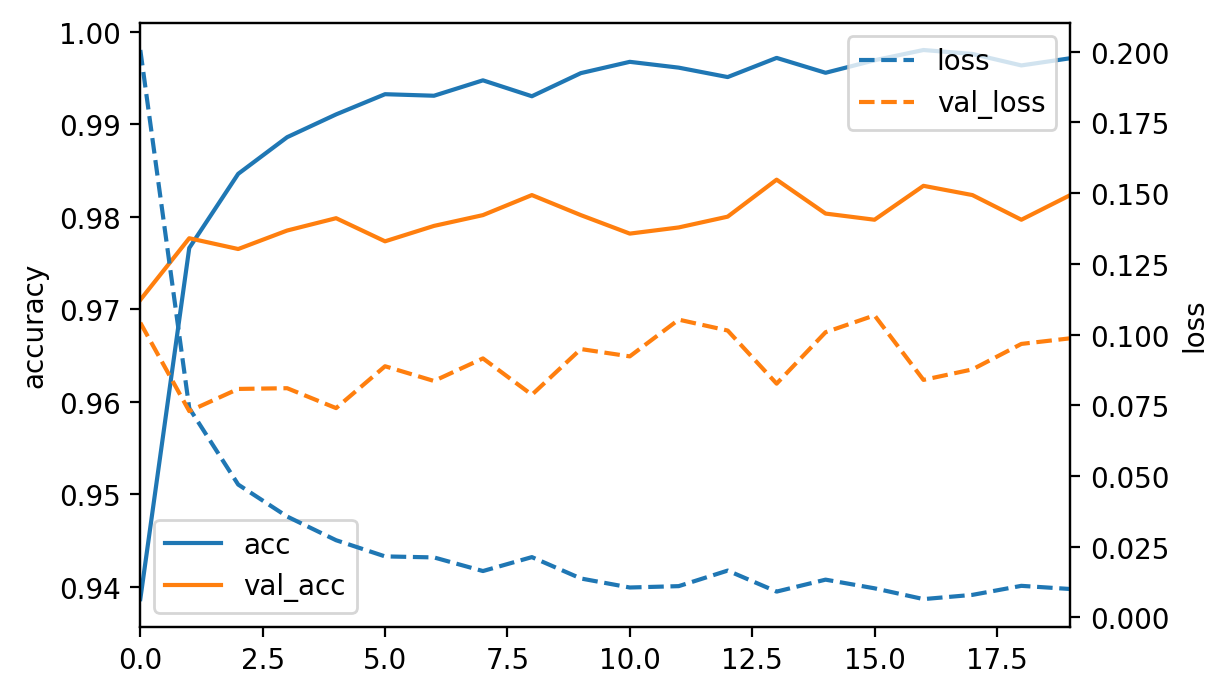

In [178]:
df = pd.DataFrame(history.history)
df[['acc', 'val_acc']].plot()
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss")

In [163]:
from keras.layers import Dropout

model_dropout = Sequential([
    Dense(1024, input_shape=(784,), activation='relu'),
    Dropout(.5),
    Dense(1024, activation='relu'),
    Dropout(.5),
    Dense(10, activation='softmax'),
])
model_dropout.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
history_dropout = model_dropout.fit(X_train, y_train, batch_size=128,
                            epochs=20, verbose=1, validation_split=.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 34s - loss: 0.2924 - acc: 0.9100 - val_loss: 0.0991 - val_acc: 0.9723
Epoch 2/20
54000/54000 [==============================] - 31s - loss: 0.1420 - acc: 0.9554 - val_loss: 0.0782 - val_acc: 0.9762
Epoch 3/20
54000/54000 [==============================] - 29s - loss: 0.1098 - acc: 0.9657 - val_loss: 0.0699 - val_acc: 0.9792
Epoch 4/20
54000/54000 [==============================] - 30s - loss: 0.0963 - acc: 0.9694 - val_loss: 0.0655 - val_acc: 0.9802
Epoch 5/20
54000/54000 [==============================] - 30s - loss: 0.0849 - acc: 0.9736 - val_loss: 0.0628 - val_acc: 0.9802
Epoch 6/20
54000/54000 [==============================] - 29s - loss: 0.0722 - acc: 0.9776 - val_loss: 0.0617 - val_acc: 0.9823
Epoch 7/20
54000/54000 [==============================] - 29s - loss: 0.0707 - acc: 0.9771 - val_loss: 0.0636 - val_acc: 0.9820
Epoch 8/20
54000/54000 [==============================]

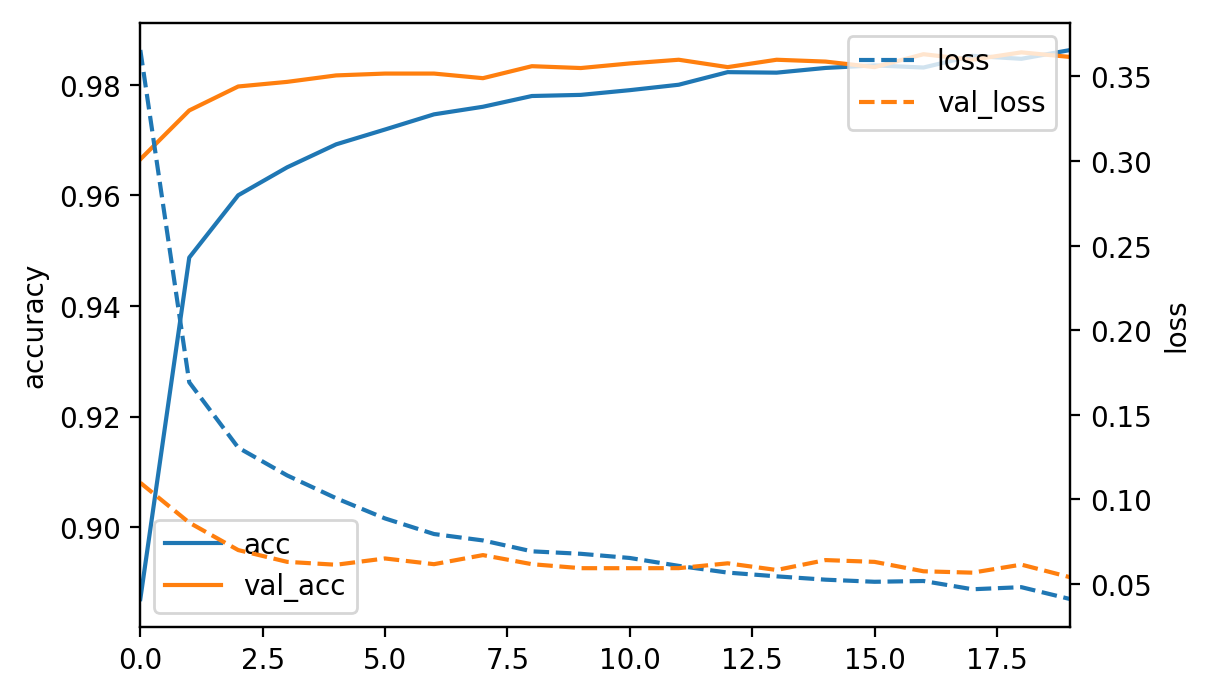

In [152]:
df = pd.DataFrame(history_dropout.history)
df[['acc', 'val_acc']].plot()
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss")

In [166]:
score = model.evaluate(X_test, y_test, verbose=0)

In [167]:
score

[0.099523187893343537, 0.9819]

# Batch Normalization

In [198]:
from keras.layers import BatchNormalization

model_bn = Sequential([
    Dense(512, input_shape=(784,)),
    BatchNormalization(),
    Activation("relu"),
    Dense(512),
    BatchNormalization(),
    Activation("relu"),
    Dense(10, activation='softmax'),
])
model_bn.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
history_bn = model.fit(X_train, y_train, batch_size=128,
                    epochs=10, verbose=1, validation_split=.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s - loss: 0.0955 - acc: 0.9725 - val_loss: 0.0776 - val_acc: 0.9795
Epoch 2/10
54000/54000 [==============================] - 1s - loss: 0.0895 - acc: 0.9737 - val_loss: 0.0789 - val_acc: 0.9772
Epoch 3/10
54000/54000 [==============================] - 1s - loss: 0.0844 - acc: 0.9752 - val_loss: 0.0775 - val_acc: 0.9772
Epoch 4/10
54000/54000 [==============================] - 1s - loss: 0.0798 - acc: 0.9770 - val_loss: 0.0778 - val_acc: 0.9775
Epoch 5/10
54000/54000 [==============================] - 1s - loss: 0.0764 - acc: 0.9780 - val_loss: 0.0792 - val_acc: 0.9773
Epoch 6/10
54000/54000 [==============================] - 1s - loss: 0.0723 - acc: 0.9786 - val_loss: 0.0865 - val_acc: 0.9763
Epoch 7/10
54000/54000 [==============================] - 1s - loss: 0.0690 - acc: 0.9801 - val_loss: 0.0825 - val_acc: 0.9758
Epoch 8/10
54000/54000 [==============================] - 1s -

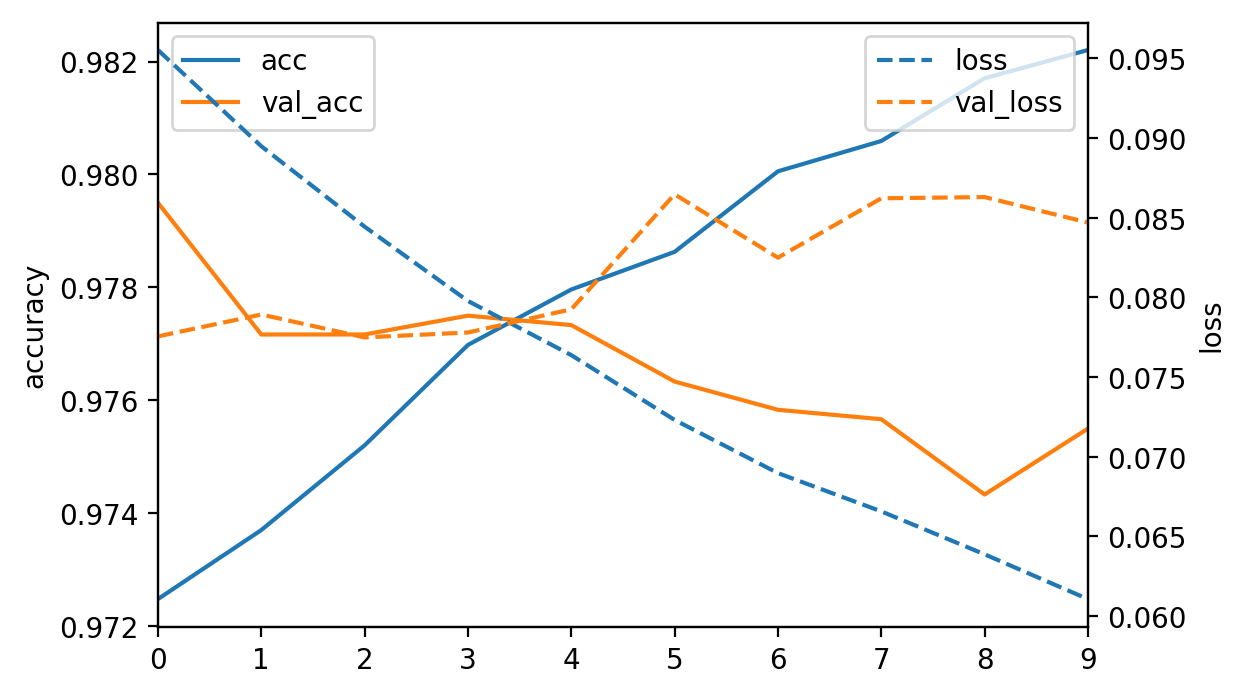

In [199]:
plot_history(history)

In [109]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams["figure.dpi"] = 200
np.set_printoptions(precision=3, suppress=True)
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

In [11]:
import tensorflow as tf
import numpy as np

# Create 100 phony x, y data points in NumPy, y = x * 0.1 + 0.3
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data * 0.1 + 0.3

# create graph: model
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b

# create graph: loss
loss = tf.reduce_mean(tf.square(y - y_data))

# bind optimizer
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

# run graph
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# Fit the line.
for step in range(201):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(W), sess.run(b))

0 [ 0.025] [ 0.482]
20 [ 0.06] [ 0.322]
40 [ 0.088] [ 0.307]
60 [ 0.096] [ 0.302]
80 [ 0.099] [ 0.301]
100 [ 0.1] [ 0.3]
120 [ 0.1] [ 0.3]
140 [ 0.1] [ 0.3]
160 [ 0.1] [ 0.3]
180 [ 0.1] [ 0.3]
200 [ 0.1] [ 0.3]


In [16]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential([
    Dense(32, input_shape=(784,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

In [17]:
model = Sequential()
model.add(Dense(32, input_dim=784))
model.add(Activation('relu'))

In [128]:
model = Sequential([
    Dense(32, input_shape=(784,), activation='relu'),
    Dense(10, activation='softmax'),
])

In [189]:
model = Sequential([
    Dense(32, input_shape=(784,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

In [190]:
model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])

In [191]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_165 (Dense)            (None, 32)                25120     
_________________________________________________________________
activation_113 (Activation)  (None, 32)                0         
_________________________________________________________________
dense_166 (Dense)            (None, 10)                330       
_________________________________________________________________
activation_114 (Activation)  (None, 10)                0         
Total params: 25,450.0
Trainable params: 25,450.0
Non-trainable params: 0.0
_________________________________________________________________


In [192]:
from keras.datasets import mnist
import keras

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [193]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

num_classes = 10
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


In [194]:
model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 3s - loss: 0.4897 - acc: 0.8680     
Epoch 2/10
60000/60000 [==============================] - 2s - loss: 0.2425 - acc: 0.9325     
Epoch 3/10
60000/60000 [==============================] - 2s - loss: 0.1993 - acc: 0.9442     
Epoch 4/10
60000/60000 [==============================] - 1s - loss: 0.1728 - acc: 0.9514     
Epoch 5/10
60000/60000 [==============================] - 1s - loss: 0.1519 - acc: 0.9570     
Epoch 6/10
60000/60000 [==============================] - 2s - loss: 0.1378 - acc: 0.9612     
Epoch 7/10
60000/60000 [==============================] - 2s - loss: 0.1263 - acc: 0.9636     
Epoch 8/10
60000/60000 [==============================] - 2s - loss: 0.1155 - acc: 0.9669     
Epoch 9/10
60000/60000 [==============================] - 1s - loss: 0.1071 - acc: 0.9694     
Epoch 10/10
60000/60000 [==============================] - 1s - loss: 0.0997 - acc: 0.9715     


In [197]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss: {:.3f}".format(score[0]))
print("Test Accuracy: {:.3f}".format(score[1]))

Test loss: 0.120
Test Accuracy: 0.966


In [134]:
# recreating the model seems the only way to reset?
model = Sequential([
    Dense(32, input_shape=(784,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])
model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])

In [135]:
model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s - loss: 0.5146 - acc: 0.8616 - val_loss: 0.2425 - val_acc: 0.9322
Epoch 2/10
54000/54000 [==============================] - 1s - loss: 0.2618 - acc: 0.9266 - val_loss: 0.1934 - val_acc: 0.9442
Epoch 3/10
54000/54000 [==============================] - 1s - loss: 0.2161 - acc: 0.9397 - val_loss: 0.1717 - val_acc: 0.9537
Epoch 4/10
54000/54000 [==============================] - 1s - loss: 0.1879 - acc: 0.9470 - val_loss: 0.1519 - val_acc: 0.9570
Epoch 5/10
54000/54000 [==============================] - 1s - loss: 0.1676 - acc: 0.9528 - val_loss: 0.1440 - val_acc: 0.9603
Epoch 6/10
54000/54000 [==============================] - 1s - loss: 0.1506 - acc: 0.9566 - val_loss: 0.1296 - val_acc: 0.9638
Epoch 7/10
54000/54000 [==============================] - 1s - loss: 0.1378 - acc: 0.9603 - val_loss: 0.1281 - val_acc: 0.9627
Epoch 8/10
54000/54000 [==============================] - 1s -

In [136]:
model = Sequential([
    Dense(32, input_shape=(784,), activation='relu'),
    Dense(10, activation='softmax'),
])
model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
history_callback = model.fit(X_train, y_train, batch_size=128,
                             epochs=100, verbose=1, validation_split=.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 2s - loss: 0.5326 - acc: 0.8579 - val_loss: 0.2436 - val_acc: 0.9325
Epoch 2/100
54000/54000 [==============================] - 1s - loss: 0.2685 - acc: 0.9243 - val_loss: 0.1953 - val_acc: 0.9465
Epoch 3/100
54000/54000 [==============================] - 1s - loss: 0.2248 - acc: 0.9368 - val_loss: 0.1723 - val_acc: 0.9533
Epoch 4/100
54000/54000 [==============================] - 1s - loss: 0.1972 - acc: 0.9435 - val_loss: 0.1582 - val_acc: 0.9567
Epoch 5/100
54000/54000 [==============================] - 1s - loss: 0.1761 - acc: 0.9491 - val_loss: 0.1478 - val_acc: 0.9618
Epoch 6/100
54000/54000 [==============================] - 1s - loss: 0.1594 - acc: 0.9537 - val_loss: 0.1394 - val_acc: 0.9625
Epoch 7/100
54000/54000 [==============================] - 1s - loss: 0.1449 - acc: 0.9578 - val_loss: 0.1264 - val_acc: 0.9645
Epoch 8/100
54000/54000 [==============================

In [164]:
def plot_history(logger):
    df = pd.DataFrame(logger.history)
    df[['acc', 'val_acc']].plot()
    plt.ylabel("accuracy")
    df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
    plt.ylabel("loss")

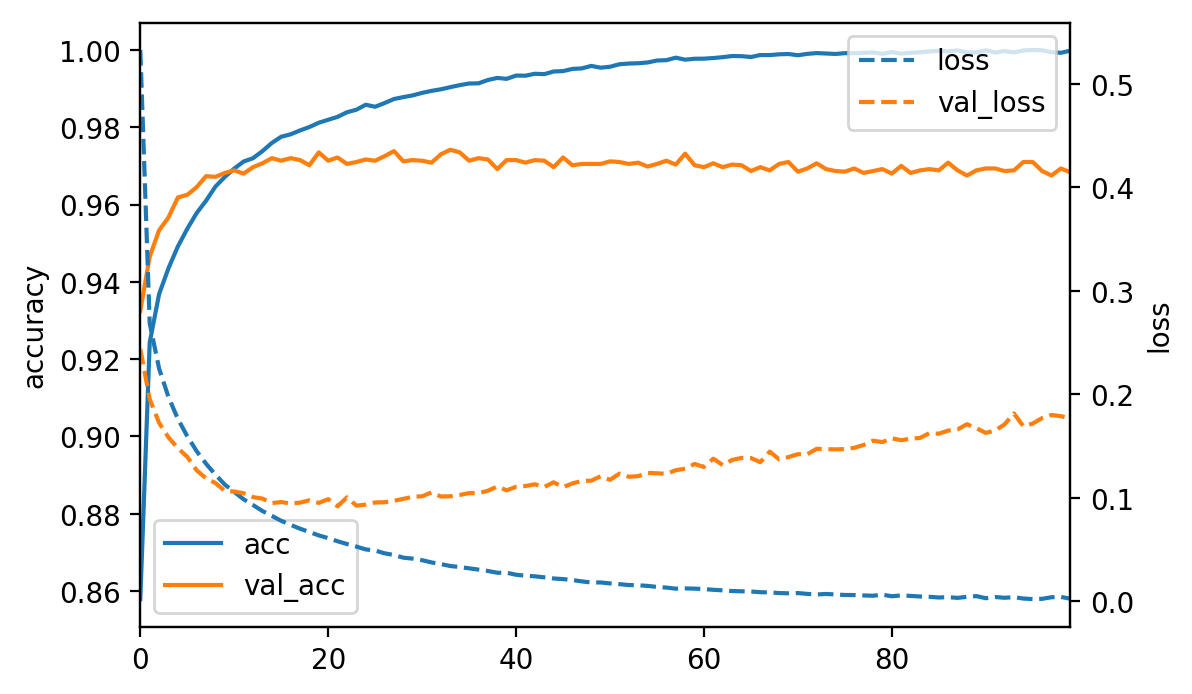

In [144]:
df = pd.DataFrame(history_callback.history)
df[['acc', 'val_acc']].plot()
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss")

In [28]:
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV

def make_model(optimizer="adam", hidden_size=32):
    model = Sequential([
        Dense(hidden_size, input_shape=(784,)),
        Activation('relu'),
        Dense(10),
        Activation('softmax'),
    ])
    model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=['accuracy'])
    return model

clf = KerasClassifier(make_model)

param_grid = {'epochs': [1, 5, 10],  # epochs is fit parameter, not in make_model!
              'hidden_size': [32, 64, 256]}

grid = GridSearchCV(clf, param_grid=param_grid, cv=5)

In [29]:
grid.fit(X_train, y_train)

Epoch 1/1
48000/48000 [==============================] - 3s - loss: 0.3930 - acc: 0.8900     
Epoch 2/5
48000/48000 [==============================] - 2s - loss: 0.2084 - acc: 0.9402     
Epoch 3/5
48000/48000 [==============================] - 3s - loss: 0.1641 - acc: 0.9524     
Epoch 4/5
48000/48000 [==============================] - 2s - loss: 0.1367 - acc: 0.9606     
Epoch 5/5
48000/48000 [==============================] - 4s - loss: 0.3337 - acc: 0.9059     
Epoch 2/5
48000/48000 [==============================] - 4s - loss: 0.1606 - acc: 0.9522     
Epoch 3/5
48000/48000 [==============================] - 3s - loss: 0.1179 - acc: 0.9648     
Epoch 4/5
48000/48000 [==============================] - 3s - loss: 0.0930 - acc: 0.9722     
Epoch 5/5
48000/48000 [==============================] - 8s - loss: 0.2480 - acc: 0.9289     
Epoch 2/5
48000/48000 [==============================] - 8s - loss: 0.1040 - acc: 0.9691     
Epoch 3/5
48000/48000 [==============================] - 8s 

GridSearchCV(cv=5, error_score='raise',
       estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f6ffea94160>,
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'epochs': [1, 5, 10], 'hidden_size': [32, 64, 256]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [33]:
res = pd.DataFrame(grid.cv_results_)
res.pivot_table(index=["param_epochs", "param_hidden_size"],
                values=['mean_train_score', "mean_test_score"])

mean_test_score  mean_train_score
param_epochs param_hidden_size                                   
1            32                        0.930017          0.935350
             64                        0.941433          0.948358
             256                       0.959117          0.966929
5            32                        0.956417          0.969746
             64                        0.967317          0.983113
             256                       0.973900          0.992196
10           32                        0.960100          0.979671
             64                        0.968617          0.992025
             256                       0.975050          0.996396

In [165]:

model = Sequential([
    Dense(1024, input_shape=(784,), activation='relu'),
    Dense(1024, activation='relu'),
    Dense(10, activation='softmax'),
])
model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=128,
                    epochs=20, verbose=1, validation_split=.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 32s - loss: 0.2006 - acc: 0.9386 - val_loss: 0.1042 - val_acc: 0.9710
Epoch 2/20
54000/54000 [==============================] - 30s - loss: 0.0740 - acc: 0.9766 - val_loss: 0.0729 - val_acc: 0.9777
Epoch 3/20
54000/54000 [==============================] - 32s - loss: 0.0470 - acc: 0.9846 - val_loss: 0.0808 - val_acc: 0.9765
Epoch 4/20
54000/54000 [==============================] - 32s - loss: 0.0357 - acc: 0.9886 - val_loss: 0.0810 - val_acc: 0.9785
Epoch 5/20
54000/54000 [==============================] - 34s - loss: 0.0273 - acc: 0.9911 - val_loss: 0.0740 - val_acc: 0.9798
Epoch 6/20
54000/54000 [==============================] - 35s - loss: 0.0216 - acc: 0.9932 - val_loss: 0.0888 - val_acc: 0.9773
Epoch 7/20
54000/54000 [==============================] - 31s - loss: 0.0212 - acc: 0.9931 - val_loss: 0.0836 - val_acc: 0.9790
Epoch 8/20
54000/54000 [==============================]

In [186]:
score = model.evaluate(X_test, y_test, verbose=0)

In [187]:
score

[0.099523187893343537, 0.9819]

In [179]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_156 (Dense)            (None, 1024)              803840    
_________________________________________________________________
dense_157 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dense_158 (Dense)            (None, 10)                10250     
Total params: 1,863,690.0
Trainable params: 1,863,690
Non-trainable params: 0.0
_________________________________________________________________


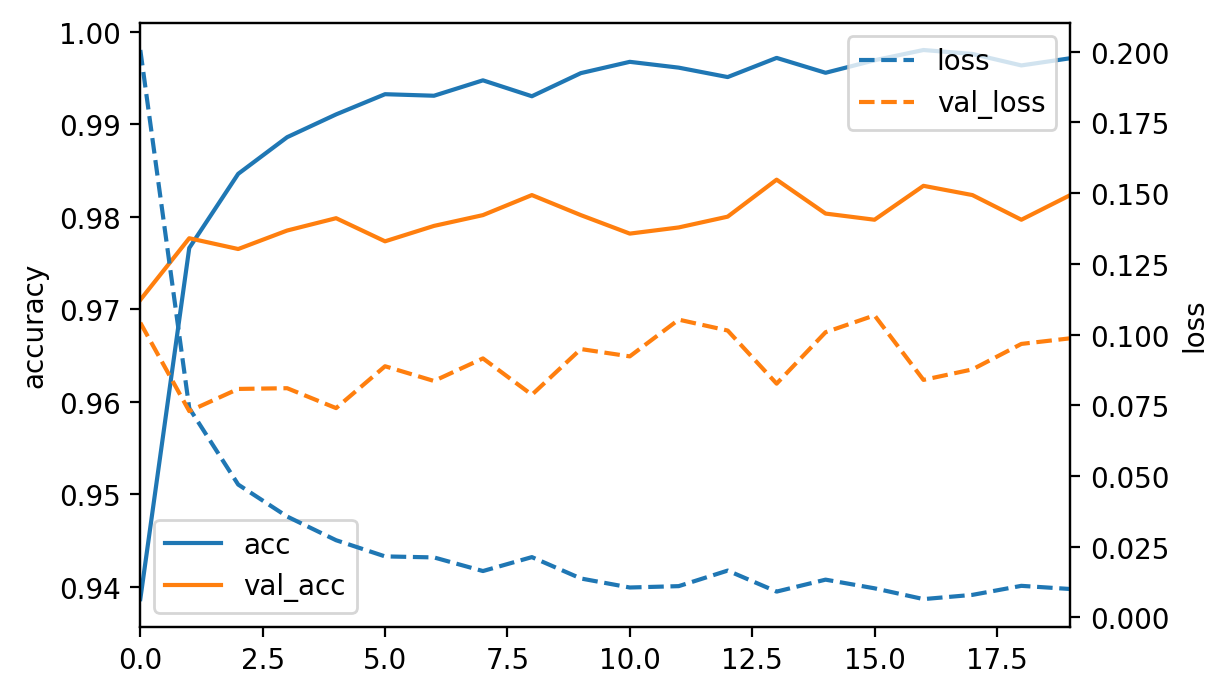

In [178]:
df = pd.DataFrame(history.history)
df[['acc', 'val_acc']].plot()
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss")

In [163]:
from keras.layers import Dropout

model_dropout = Sequential([
    Dense(1024, input_shape=(784,), activation='relu'),
    Dropout(.5),
    Dense(1024, activation='relu'),
    Dropout(.5),
    Dense(10, activation='softmax'),
])
model_dropout.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
history_dropout = model_dropout.fit(X_train, y_train, batch_size=128,
                            epochs=20, verbose=1, validation_split=.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 34s - loss: 0.2924 - acc: 0.9100 - val_loss: 0.0991 - val_acc: 0.9723
Epoch 2/20
54000/54000 [==============================] - 31s - loss: 0.1420 - acc: 0.9554 - val_loss: 0.0782 - val_acc: 0.9762
Epoch 3/20
54000/54000 [==============================] - 29s - loss: 0.1098 - acc: 0.9657 - val_loss: 0.0699 - val_acc: 0.9792
Epoch 4/20
54000/54000 [==============================] - 30s - loss: 0.0963 - acc: 0.9694 - val_loss: 0.0655 - val_acc: 0.9802
Epoch 5/20
54000/54000 [==============================] - 30s - loss: 0.0849 - acc: 0.9736 - val_loss: 0.0628 - val_acc: 0.9802
Epoch 6/20
54000/54000 [==============================] - 29s - loss: 0.0722 - acc: 0.9776 - val_loss: 0.0617 - val_acc: 0.9823
Epoch 7/20
54000/54000 [==============================] - 29s - loss: 0.0707 - acc: 0.9771 - val_loss: 0.0636 - val_acc: 0.9820
Epoch 8/20
54000/54000 [==============================]

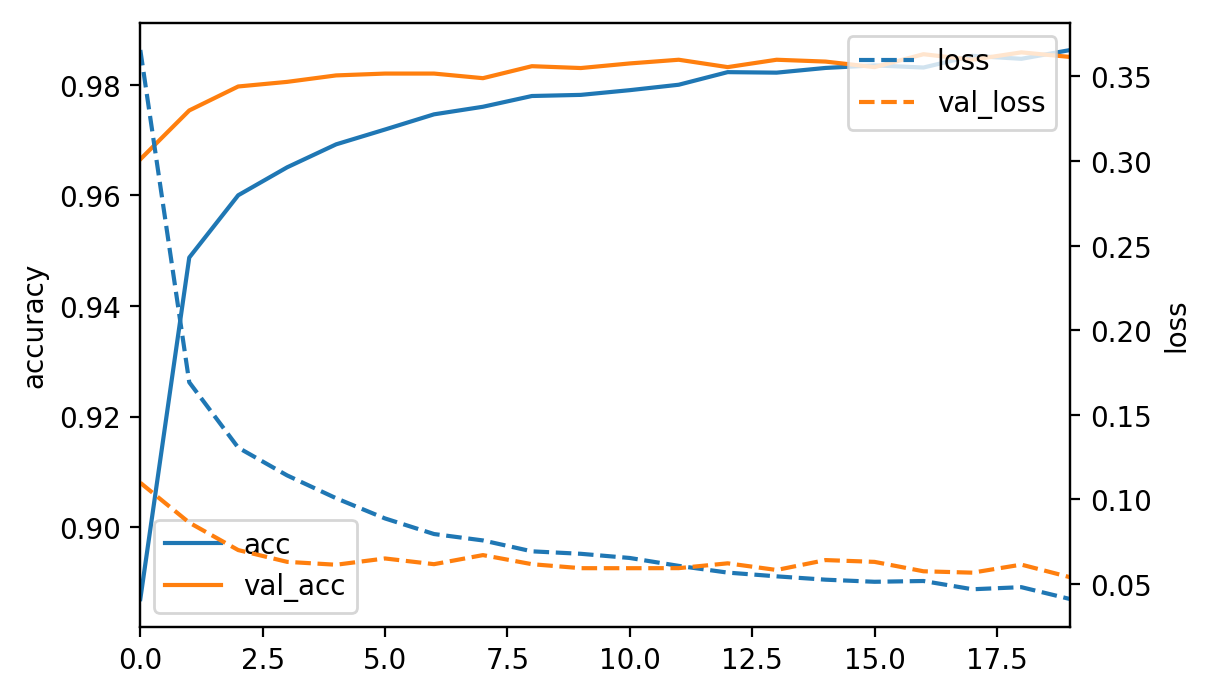

In [152]:
df = pd.DataFrame(history_dropout.history)
df[['acc', 'val_acc']].plot()
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss")

In [166]:
score = model.evaluate(X_test, y_test, verbose=0)

In [167]:
score

[0.099523187893343537, 0.9819]

# Batch Normalization

In [198]:
from keras.layers import BatchNormalization

model_bn = Sequential([
    Dense(512, input_shape=(784,)),
    BatchNormalization(),
    Activation("relu"),
    Dense(512),
    BatchNormalization(),
    Activation("relu"),
    Dense(10, activation='softmax'),
])
model_bn.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
history_bn = model.fit(X_train, y_train, batch_size=128,
                    epochs=10, verbose=1, validation_split=.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s - loss: 0.0955 - acc: 0.9725 - val_loss: 0.0776 - val_acc: 0.9795
Epoch 2/10
54000/54000 [==============================] - 1s - loss: 0.0895 - acc: 0.9737 - val_loss: 0.0789 - val_acc: 0.9772
Epoch 3/10
54000/54000 [==============================] - 1s - loss: 0.0844 - acc: 0.9752 - val_loss: 0.0775 - val_acc: 0.9772
Epoch 4/10
54000/54000 [==============================] - 1s - loss: 0.0798 - acc: 0.9770 - val_loss: 0.0778 - val_acc: 0.9775
Epoch 5/10
54000/54000 [==============================] - 1s - loss: 0.0764 - acc: 0.9780 - val_loss: 0.0792 - val_acc: 0.9773
Epoch 6/10
54000/54000 [==============================] - 1s - loss: 0.0723 - acc: 0.9786 - val_loss: 0.0865 - val_acc: 0.9763
Epoch 7/10
54000/54000 [==============================] - 1s - loss: 0.0690 - acc: 0.9801 - val_loss: 0.0825 - val_acc: 0.9758
Epoch 8/10
54000/54000 [==============================] - 1s -

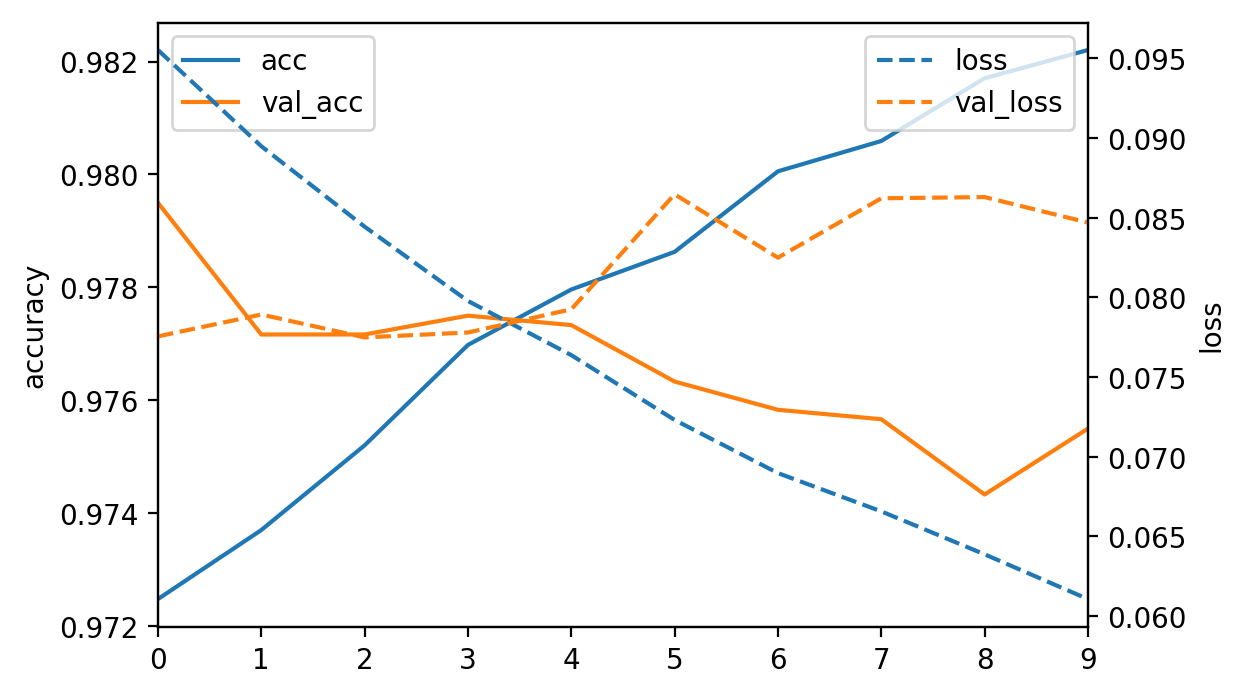

In [199]:
plot_history(history)